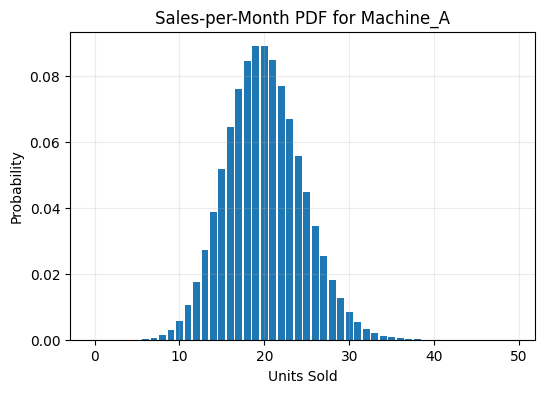

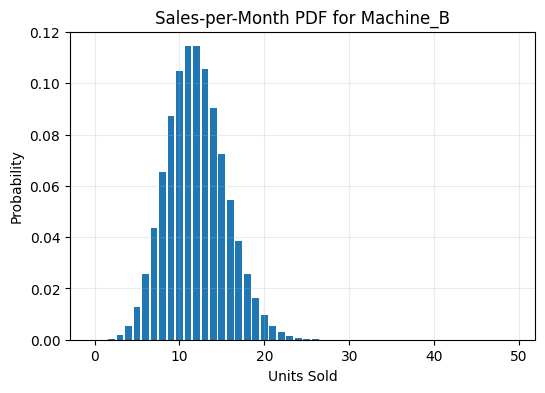

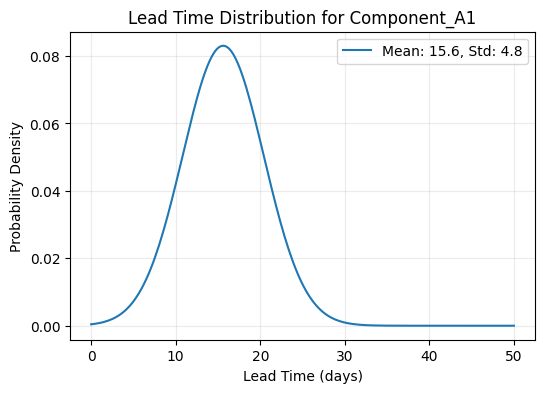

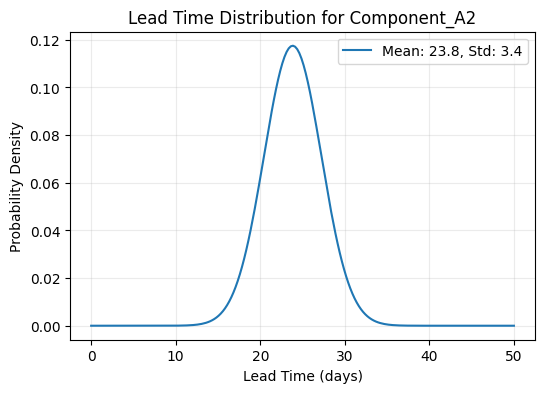

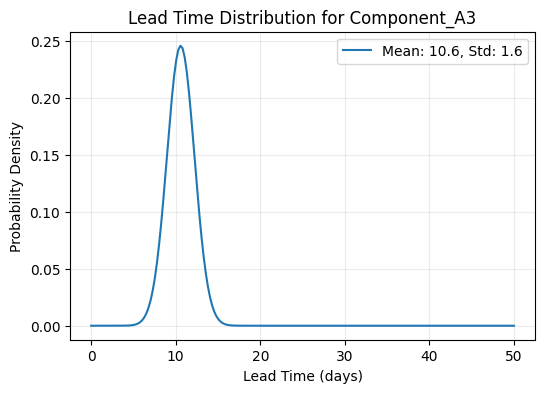

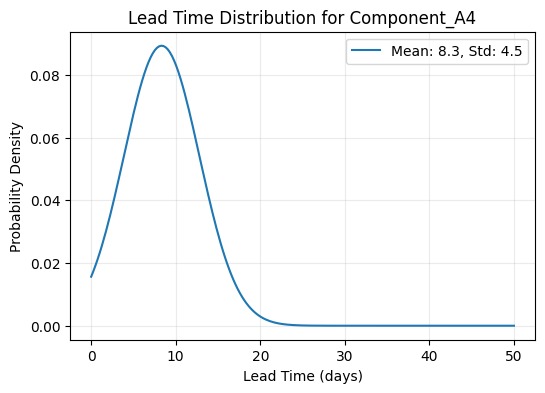

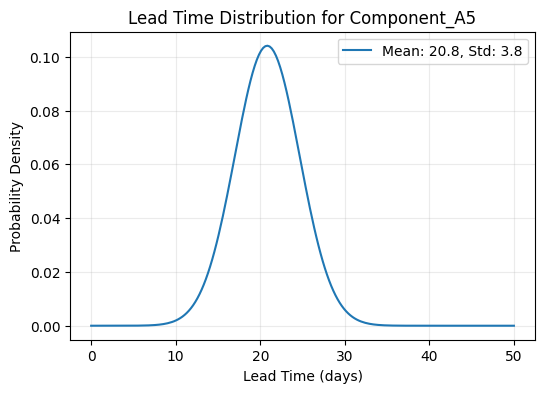

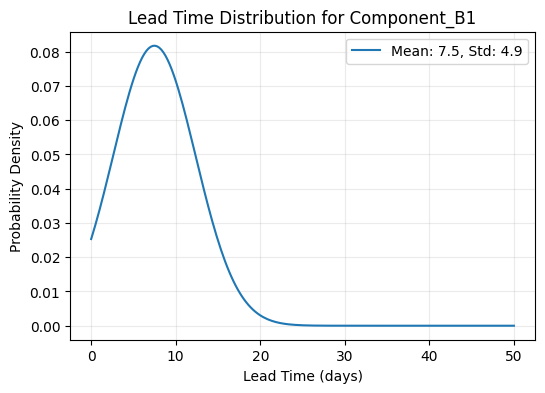

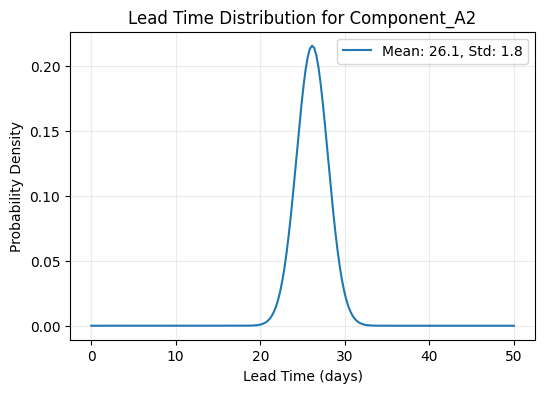

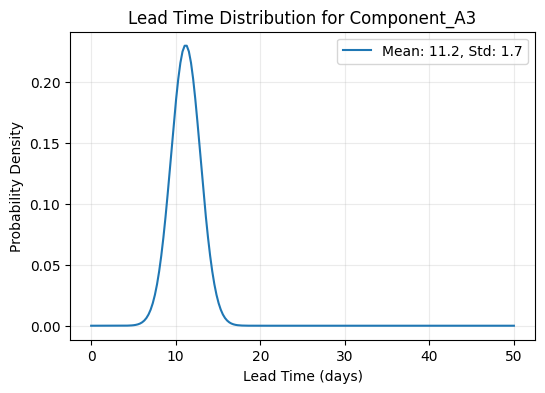

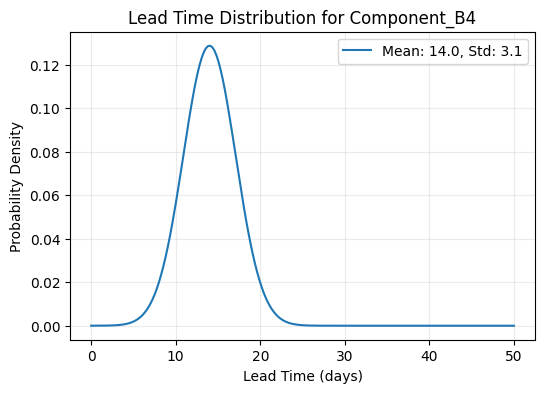

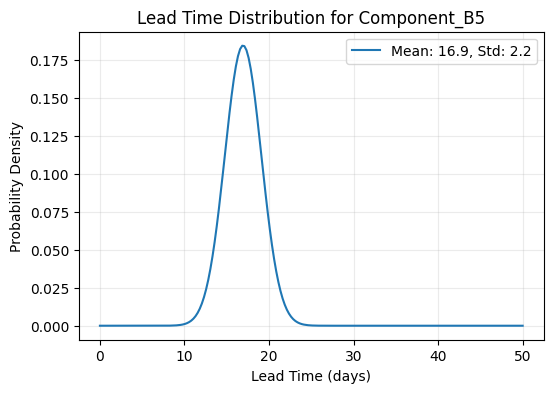

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, norm

# Define machines and their components
machines = {
    'Machine_A': ['Component_A1', 'Component_A2', 'Component_A3', 'Component_A4', 'Component_A5'],
    'Machine_B': ['Component_B1', 'Component_A2', 'Component_A3', 'Component_B4', 'Component_B5']
}

# Generate PDF for sales-per-month for each machine (e.g., Poisson distribution for discrete sales numbers)
machine_sales_distributions = {}
for machine in machines:
    # Let's choose arbitrary Poisson means for each machine
    if machine == 'Machine_A':
        rate = 20
    else:
        rate = 12
    sales_range = np.arange(0, 50)
    sales_pdf = poisson.pmf(sales_range, mu=rate)
    machine_sales_distributions[machine] = (sales_range, sales_pdf)
    # Plot PDF
    plt.figure(figsize=(6, 4))
    plt.bar(sales_range, sales_pdf)
    plt.title(f'Sales-per-Month PDF for {machine}')
    plt.xlabel('Units Sold')
    plt.ylabel('Probability')
    plt.grid(alpha=0.25)
    plt.show()

# Create lead time distribution for each component (e.g., Normal distribution for lead times in days)
np.random.seed(42)  # For reproducibility
component_lead_time_distributions = {}
for machine, components in machines.items():
    for comp in components:
        # Randomly assign mean and std for lead time
        mean_lead = np.random.uniform(7, 30)    # mean lead time between 1-4 weeks
        std_lead = np.random.uniform(1, 5)      # std deviation
        lead_days = np.linspace(0, 50, 200)
        lead_pdf = norm.pdf(lead_days, loc=mean_lead, scale=std_lead)
        component_lead_time_distributions[comp] = (lead_days, lead_pdf, mean_lead, std_lead)
        # Plot PDF
        plt.figure(figsize=(6, 4))
        plt.plot(lead_days, lead_pdf, label=f'Mean: {mean_lead:.1f}, Std: {std_lead:.1f}')
        plt.title(f'Lead Time Distribution for {comp}')
        plt.xlabel('Lead Time (days)')
        plt.ylabel('Probability Density')
        plt.legend()
        plt.grid(alpha=0.25)
        plt.show()


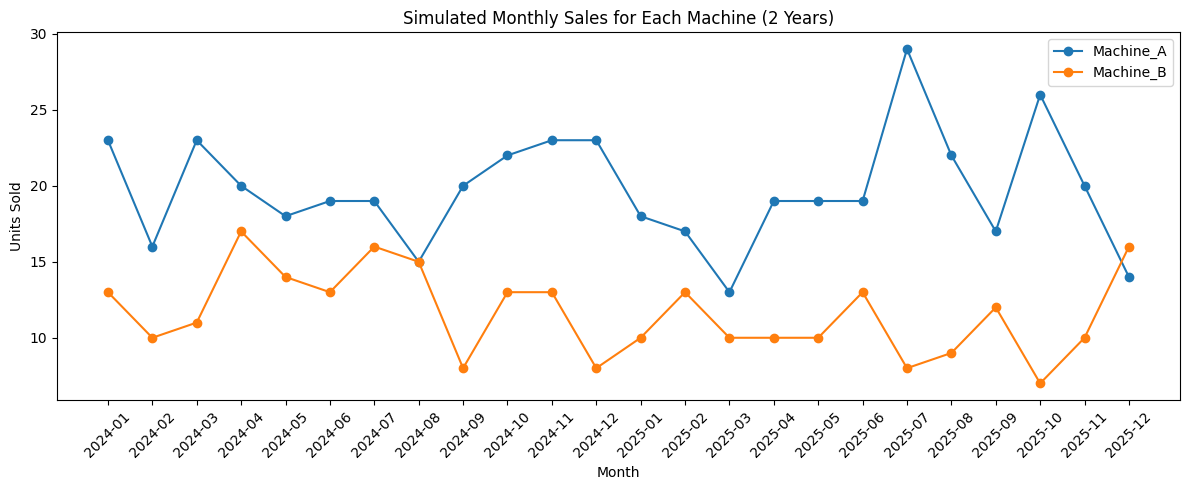

TypeError: list indices must be integers or slices, not str

In [ ]:
# Simulate 2 years (24 months) of sales for each machine using their Poisson distribution

np.random.seed(123)  # For reproducibility

months = []
for year in [2024, 2025]:
    for m in range(1, 13):
        months.append(f"{year}-{m:02}")

sales_simulation = {'Month': months}
for machine in machines.keys():
    # Determine the lambda value used above for each machine
    if machine == 'Machine_A':
        lam = 20
    else:
        lam = 12
    sales_simulation[machine] = np.random.poisson(lam=lam, size=24)

sales_sim_df = pd.DataFrame(sales_simulation)
# display(sales_sim_df)

# Optionally: plot sales over time for each machine
plt.figure(figsize=(12, 5))
for machine in machines.keys():
    plt.plot(sales_sim_df['Month'], sales_sim_df[machine], marker='o', label=machine)
plt.title("Simulated Monthly Sales for Each Machine (2 Years)")
plt.xlabel("Month")
plt.ylabel("Units Sold")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()






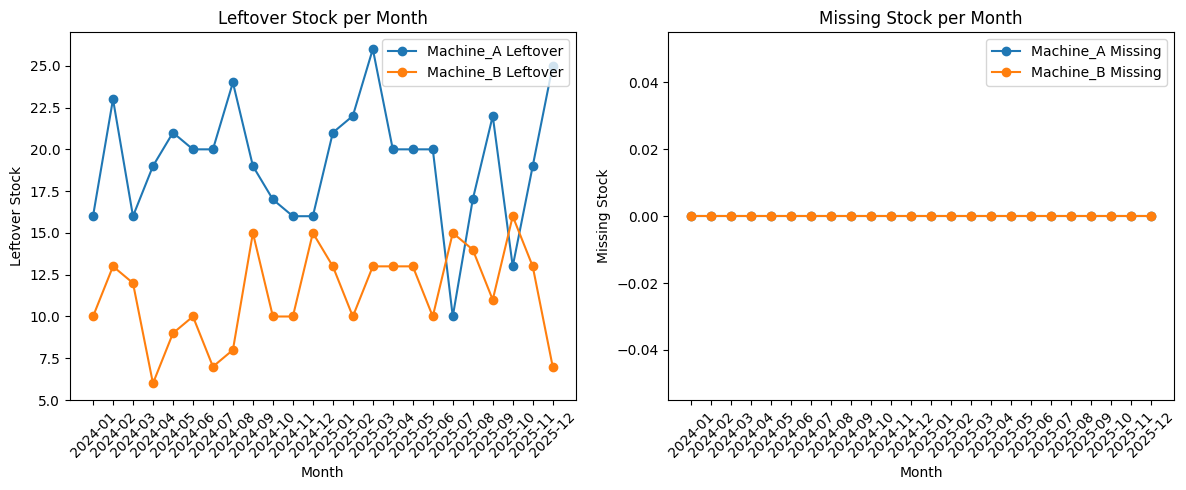

Machine_A Stock Analysis:
  Average Leftover Stock: 19.25
  Average Missing Stock: 0.00
  Max Leftover Stock: 26
  Max Missing Stock: 0

Machine_B Stock Analysis:
  Average Leftover Stock: 11.38
  Average Missing Stock: 0.00
  Max Leftover Stock: 16
  Max Missing Stock: 0



In [ ]:
# Compute average monthly sales for each machine
avg_monthly_sales = sales_sim_df[list(machines.keys())].mean()

# Define initial stock levels (n_avg_sales times average monthly sales)
n_avg_sales = 2  # Stock buffer of 2 months of average sales
initial_stock = {machine: int(avg_sales * n_avg_sales) for machine, avg_sales in avg_monthly_sales.items()}

# Track stock levels month by month
stock_tracking = {}
leftover_stock = {}
missing_stock = {}

for machine in machines.keys():
    stock_tracking[machine] = [initial_stock[machine]]
    leftover_stock[machine] = []
    missing_stock[machine] = []

    for sales in sales_sim_df[machine]:
        current_stock = stock_tracking[machine][-1]
        
        # Calculate stock after sales
        new_stock = current_stock - sales
        
        # Track leftover and missing stock
        if new_stock >= 0:
            leftover_stock[machine].append(new_stock)
            missing_stock[machine].append(0)
        else:
            leftover_stock[machine].append(0)
            missing_stock[machine].append(abs(new_stock))
        
        # Add next month's stock (replenish to initial stock level)
        stock_tracking[machine].append(initial_stock[machine])

# Visualize stock tracking
plt.figure(figsize=(12, 5))
for machine in machines.keys():
    plt.subplot(1, 2, 1)
    plt.plot(sales_sim_df['Month'], leftover_stock[machine], marker='o', label=f'{machine} Leftover')
    plt.title("Leftover Stock per Month")
    plt.xlabel("Month")
    plt.ylabel("Leftover Stock")
    plt.xticks(rotation=45)
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(sales_sim_df['Month'], missing_stock[machine], marker='o', label=f'{machine} Missing')
    plt.title("Missing Stock per Month")
    plt.xlabel("Month")
    plt.ylabel("Missing Stock")
    plt.xticks(rotation=45)
    plt.legend()

plt.tight_layout()
plt.show()

# Compute summary statistics
for machine in machines.keys():
    print(f"{machine} Stock Analysis:")
    print(f"  Average Leftover Stock: {np.mean(leftover_stock[machine]):.2f}")
    print(f"  Average Missing Stock: {np.mean(missing_stock[machine]):.2f}")
    print(f"  Max Leftover Stock: {max(leftover_stock[machine])}")
    print(f"  Max Missing Stock: {max(missing_stock[machine])}")
    print()

# Modelo -> loss function -> custo diferente pra sobra e falta (custo de estoque vs custo de atraso). 

In [ ]:

import os
import pandas as pd
import numpy as np
from scipy.stats import poisson

# Set the parent directory containing the subfolders for each year
parent_dir = '.'

# List of years and months to include
years = ['2024', '2025']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
          'August', 'September', 'October', 'November', 'December']

# List to hold dataframes
dfs = []

for year in years:
    for month in months:
        folder_path = os.path.join(parent_dir, year, month)
        if not os.path.exists(folder_path):
            continue
        # Find all .xlsx files in the folder
        for fname in os.listdir(folder_path):
            if fname.endswith('.xlsx'):
                file_path = os.path.join(folder_path, fname)
                try:
                    df = pd.read_excel(file_path)
                    # Add source columns
                    df['Year'] = year
                    df['Month'] = month
                    df['SourceFile'] = fname
                    dfs.append(df)
                except Exception as e:
                    print(f"Error reading {file_path}: {e}")

if not dfs:
    print("No Excel files found to combine.")
else:
    combined_df = pd.concat(dfs, ignore_index=True)

    # Save the combined dataframe for reference
    combined_df.to_excel('combined_components.xlsx', index=False)
    print("Combined spreadsheet saved as 'combined_components.xlsx'")

    # Now, extract Poisson parameters for each machine
    # Group by machine, sum over the total period, or by month if preferred
    machine_groups = combined_df.groupby('machine')

    poisson_distributions = {}
    period_length = len(combined_df['Year'].unique()) * len(combined_df['Month'].unique())

    for machine, group in machine_groups:
        n_sold_counts = group['n_sold'].values
        lambda_hat = np.mean(n_sold_counts)  # MLE estimator for Poisson is the sample mean

        # Store the distribution object itself, and summary stats
        poisson_distributions[machine] = {
            "lambda": lambda_hat,
            "poisson_dist": poisson(mu=lambda_hat),
            "n_periods": len(n_sold_counts),
            "sales_samples": n_sold_counts
        }

        print(f"Machine: {machine}")
        print(f"  λ (mean sales per period): {lambda_hat:.3f}")
        print(f"  Periods: {len(n_sold_counts)}")
        print(f"  Total sold: {np.sum(n_sold_counts)}")
        print("")

    # Example: plot the fitted Poisson distributions for each machine
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 5))
    k_max = {}
    for i, (machine, info) in enumerate(poisson_distributions.items()):
        sales_counts = info["sales_samples"]
        lam = info["lambda"]
        k_range = np.arange(0, max(sales_counts.max(), int(lam + 3 * np.sqrt(lam)), 20) + 1)
        kde = poisson(mu=lam).pmf(k_range)
        plt.plot(k_range, kde, marker='o', label=f'{machine} (λ={lam:.2f})')
        k_max[machine] = k_range[-1]
    plt.title('Poisson Sales Distributions Fitted per Machine')
    plt.xlabel('Number Sold per Period')
    plt.ylabel('Probability')
    plt.legend()
    plt.grid(alpha=0.2)
    plt.tight_layout()
    plt.show()
